In [100]:
import pandas as pd
import json
import numpy as np
import os
import matplotlib.pyplot as plt

In [101]:
def convert_json_to_csv(input_file, output_file):
    try:
        with open(input_file, 'r') as file:
            content = json.load(file)

        if isinstance(content, list):
            dataframe = pd.DataFrame(content) 
        else:
            dataframe = pd.DataFrame([content])  

        dataframe.to_csv(output_file, index=False)
        print(f"Successfully converted {input_file} to {output_file}!")

    except Exception as error:
        print(f"An error occurred while processing {input_file}: {error}")

In [102]:
convert_json_to_csv("past_quizes.json", "table_past_quizzes.csv")
convert_json_to_csv("user_quiz.json", "table_user_quiz.csv")

Successfully converted past_quizes.json to table_past_quizzes.csv!
Successfully converted user_quiz.json to table_user_quiz.csv!


In [103]:
def process_quiz_endpoint():
    try:
        with open("quiz endpoint.json", 'r') as file:
            data = json.load(file)

        quiz_df = pd.json_normalize(data['quiz'], sep='_')

        if 'questions' in data['quiz']:
            questions_df = pd.json_normalize(data['quiz']['questions'], sep='_')
        else:
            questions_df = pd.DataFrame()  

        quiz_df.to_csv("quiz_endpoint_table.csv", index=False)
        questions_df.to_csv("quiz_questions_table.csv", index=False)

        print("Successfully processed 'quiz endpoint.json'!")

    except Exception as e:
        print(f"Error processing 'quiz endpoint.json': {e}")

process_quiz_endpoint()


Successfully processed 'quiz endpoint.json'!


In [104]:
df_ques=pd.read_csv("quiz_questions_table.csv")
df_user=pd.read_csv("table_user_quiz.csv")
df_past=pd.read_csv("table_past_quizzes.csv")

In [105]:
print(df_ques.isnull().sum())

id                       0
description              0
difficulty_level       128
topic                    0
is_published             0
created_at               0
updated_at               0
detailed_solution        9
type                   128
is_mandatory             0
show_in_feed             0
pyq_label              128
topic_id                 0
reading_material_id      0
fixed_at               123
fix_summary            123
created_by             128
updated_by             123
quiz_level             128
question_from            0
language               128
photo_url              125
photo_solution_url     128
is_saved                 0
tag                    128
options                  0
dtype: int64


In [106]:
df_quess = df_ques.drop(columns=['fixed_at', 'fix_summary', 'updated_by', 'photo_url'])
df_quess = df_quess.dropna(subset=['detailed_solution'])


In [107]:
with open('past_quizes.json', 'r') as file:
    data = json.load(file)

quiz_data = [entry['quiz'] for entry in data]

quiz_df = pd.DataFrame(quiz_data)

quiz_df.to_csv('quiz_table.csv', index=False)

print("Quiz table created successfully and saved as 'quiz_table.csv'.")

Quiz table created successfully and saved as 'quiz_table.csv'.


In [108]:
quiz_df = quiz_df.drop(columns=['name', 'difficulty_level', 'reading_material', 'quiz_type', 'banner_id', 'exam_id',"lives"])


In [112]:
df_end=pd.read_csv("quiz_endpoint_table.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1 non-null      int64  
 1   name                  0 non-null      float64
 2   title                 1 non-null      object 
 3   description           0 non-null      float64
 4   difficulty_level      0 non-null      float64
 5   topic                 1 non-null      object 
 6   time                  1 non-null      object 
 7   is_published          1 non-null      bool   
 8   created_at            1 non-null      object 
 9   updated_at            1 non-null      object 
 10  duration              1 non-null      int64  
 11  end_time              1 non-null      object 
 12  negative_marks        1 non-null      float64
 13  correct_answer_marks  1 non-null      float64
 14  shuffle               1 non-null      bool   
 15  show_answers          1 non

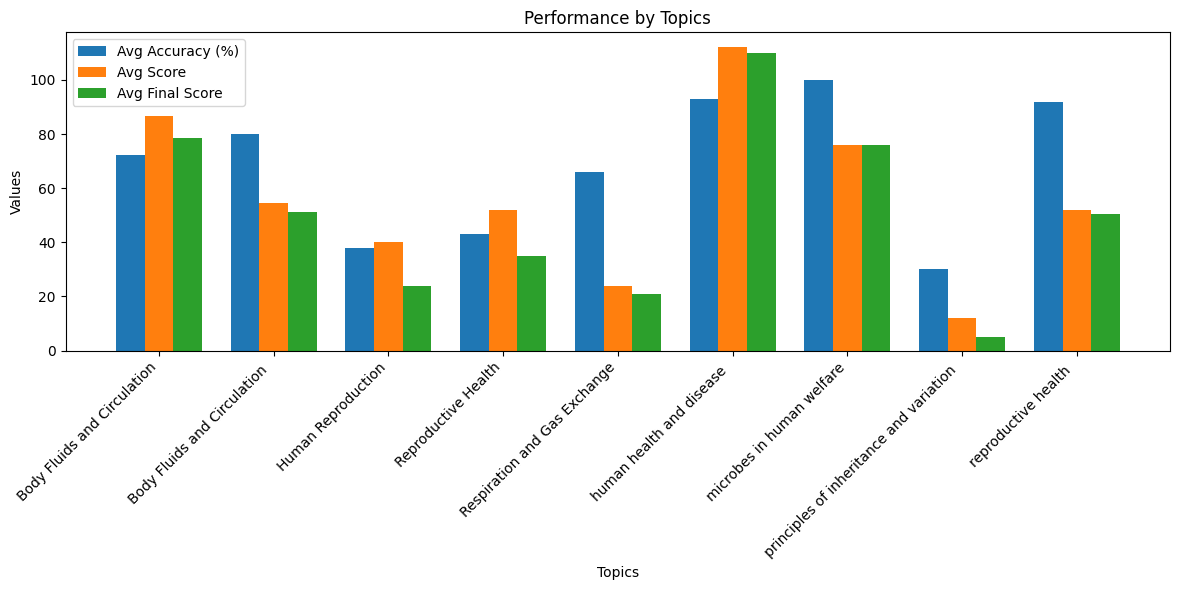

In [114]:
df_past['quiz_id'] = df_past['quiz_id'].astype(int)
quiz_df['id'] = quiz_df['id'].astype(int)
df_merged = df_past.merge(quiz_df[['id', 'topic']], left_on='quiz_id', right_on='id', how='left')
if 'topic' in df_merged.columns:
    topic_analysis = df_merged.groupby('topic').agg(
        Avg_Accuracy=('accuracy', lambda x: pd.to_numeric(x.str.rstrip('%')).mean()),
        Avg_Score=('score', 'mean'),
        Avg_Final_Score=('final_score', 'mean')
    ).reset_index()
    topic_analysis.columns = ['Topic', 'Avg Accuracy (%)', 'Avg Score', 'Avg Final Score']
    def visualize_by_topic(topic_analysis):
        topics = topic_analysis['Topic']
        accuracy = topic_analysis['Avg Accuracy (%)']
        score = topic_analysis['Avg Score']
        final_score = topic_analysis['Avg Final Score']
        plt.figure(figsize=(12, 6))
        x = range(len(topics))
        plt.bar(x, accuracy, width=0.25, label='Avg Accuracy (%)', align='center')
        plt.bar([i + 0.25 for i in x], score, width=0.25, label='Avg Score', align='center')
        plt.bar([i + 0.50 for i in x], final_score, width=0.25, label='Avg Final Score', align='center')
        plt.xticks([i + 0.25 for i in x], topics, rotation=45, ha='right')
        plt.xlabel('Topics')
        plt.ylabel('Values')
        plt.title('Performance by Topics')
        plt.legend()
        plt.tight_layout()
        plt.show()
    visualize_by_topic(topic_analysis)
else:
    print("Topic column is missing in the merged DataFrame.")


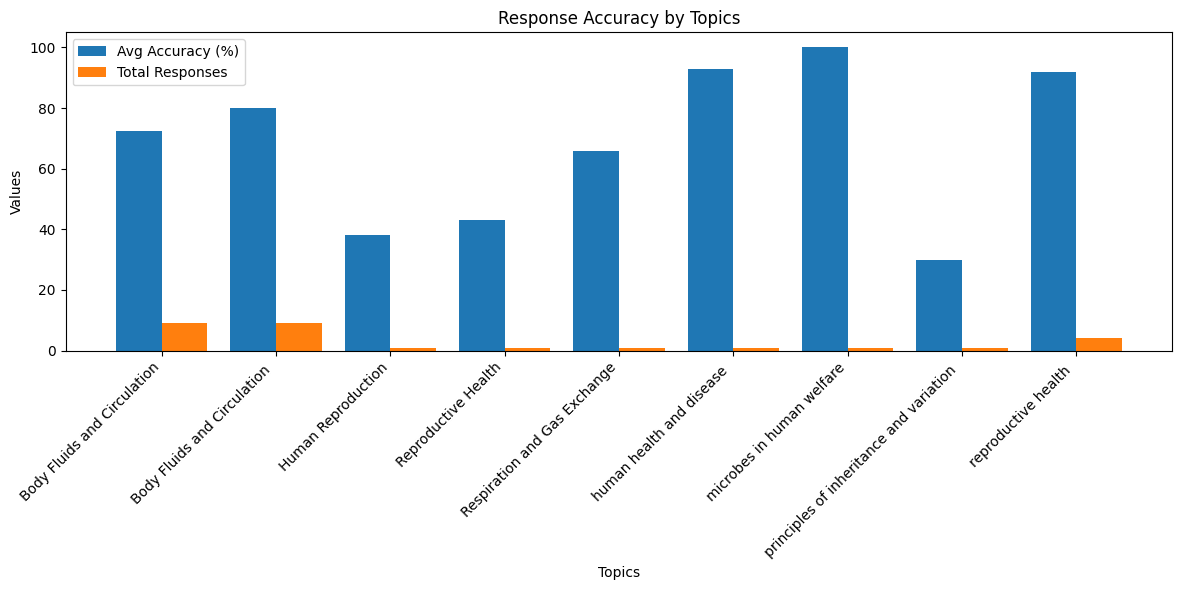

In [115]:
df_past['quiz_id'] = df_past['quiz_id'].astype(int)
quiz_df['id'] = quiz_df['id'].astype(int)
df_merged = df_past.merge(quiz_df[['id', 'topic']], left_on='quiz_id', right_on='id', how='left')
if 'topic' in df_merged.columns and 'accuracy' in df_past.columns:
    accuracy_analysis = df_merged.groupby('topic').agg(
        Avg_Accuracy=('accuracy', lambda x: pd.to_numeric(x.str.rstrip('%')).mean()),
        Total_Responses=('accuracy', 'count')
    ).reset_index()
    accuracy_analysis.columns = ['Topic', 'Avg Accuracy (%)', 'Total Responses']
    def visualize_response_accuracy(accuracy_analysis):
        topics = accuracy_analysis['Topic']
        avg_accuracy = accuracy_analysis['Avg Accuracy (%)']
        total_responses = accuracy_analysis['Total Responses']
        plt.figure(figsize=(12, 6))
        x = range(len(topics))
        plt.bar(x, avg_accuracy, width=0.4, label='Avg Accuracy (%)', align='center')
        plt.bar([i + 0.4 for i in x], total_responses, width=0.4, label='Total Responses', align='center')
        plt.xticks([i + 0.2 for i in x], topics, rotation=45, ha='right')
        plt.xlabel('Topics')
        plt.ylabel('Values')
        plt.title('Response Accuracy by Topics')
        plt.legend()
        plt.tight_layout()
        plt.show()
    visualize_response_accuracy(accuracy_analysis)
else:
    print("Required columns for response accuracy analysis are missing in the DataFrame.")


Overall Accuracy: 72.21%
Overall Score: 60.29

Weak Topics:
                                      topic  Avg_Accuracy  Avg_Score  \
2                        Human Reproduction          38.0       40.0   
3                       Reproductive Health          43.0       52.0   
4              Respiration and Gas Exchange          66.0       24.0   
7  principles of inheritance and variation           30.0       12.0   

   Total_Quizzes  
2              1  
3              1  
4              1  
7              1  


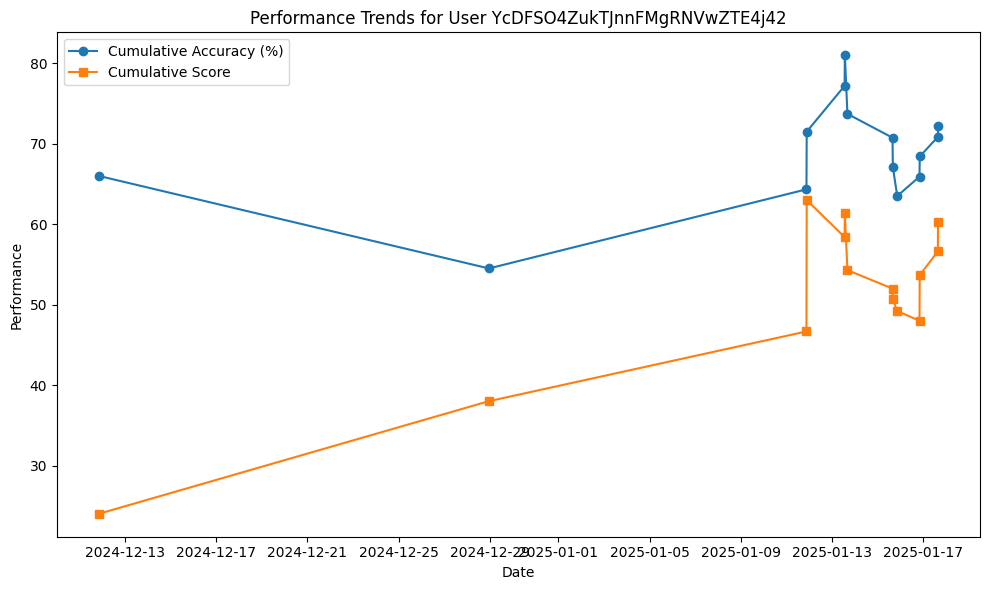

In [ ]:
if df_past['accuracy'].dtype != 'object':
    df_past['accuracy'] = df_past['accuracy'].astype(str)

df_past['accuracy'] = pd.to_numeric(df_past['accuracy'].str.rstrip('%'), errors='coerce')

def generate_user_insights(user_id, df_past, quiz_df):
    user_data = df_past[df_past['user_id'] == user_id]
    
    if user_data.empty:
        print(f"No data found for user {user_id}")
        return

    merged_data = user_data.merge(quiz_df[['id', 'topic']], left_on='quiz_id', right_on='id', how='left')
    
    overall_accuracy = user_data['accuracy'].mean()
    overall_score = user_data['score'].mean()
    
    topic_performance = merged_data.groupby('topic').agg(
        Avg_Accuracy=('accuracy', 'mean'),
        Avg_Score=('score', 'mean'),
        Total_Quizzes=('quiz_id', 'count')
    ).reset_index()
    weak_topics = topic_performance[topic_performance['Avg_Accuracy'] < overall_accuracy]
    
    user_data['submitted_at'] = pd.to_datetime(user_data['submitted_at'], errors='coerce')
    user_data = user_data.sort_values(by='submitted_at')
    user_data['Cumulative_Accuracy'] = user_data['accuracy'].expanding().mean()
    user_data['Cumulative_Score'] = user_data['score'].expanding().mean()
    
    print(f"Overall Accuracy: {overall_accuracy:.2f}%")
    print(f"Overall Score: {overall_score:.2f}")
    print("\nWeak Topics:")
    print(weak_topics)
    
    def visualize_user_trends(user_data):
        plt.figure(figsize=(10, 6))
        plt.plot(user_data['submitted_at'], user_data['Cumulative_Accuracy'], label='Cumulative Accuracy (%)', marker='o')
        plt.plot(user_data['submitted_at'], user_data['Cumulative_Score'], label='Cumulative Score', marker='s')
        plt.xlabel('Date')
        plt.ylabel('Performance')
        plt.title(f'Performance Trends for User {user_id}')
        plt.legend()
        plt.tight_layout()
        plt.show()

    visualize_user_trends(user_data)

generate_user_insights("YcDFSO4ZukTJnnFMgRNVwZTE4j42", df_past, quiz_df)


In [127]:
def generate_recommendations(df_user, insights, weak_topics):
    recommendations = []

    for _, user_row in df_user.iterrows():
        user_id = user_row['user_id']
        user_name = user_row.get('name', f"User {user_id}")
        user_trophy_level = user_row.get('trophy_level', None)
        
        rec = f"{user_name}: "

        overall_accuracy = insights['overall_accuracy']
        overall_score = insights['overall_score']

        if overall_accuracy < 70:
            rec += f"Improve your accuracy, currently at {overall_accuracy:.2f}%. "
        if overall_score < 50:
            rec += f"Focus on raising your average score of {overall_score:.2f}. "

        if not weak_topics.empty:
            weak_topic_list = ", ".join(weak_topics['topic'].tolist())
            rec += f"Focus on these weak topics: {weak_topic_list}. "
        else:
            rec += "Great job! No weak topics identified. "

        if user_trophy_level and user_trophy_level < 3:
            rec += "Engage in more quizzes to improve your trophy level."
        elif user_trophy_level and user_trophy_level >= 3:
            rec += "You are doing well with your quiz participation, keep it up!"

        recommendations.append(rec)

    print("\nPersonalized Recommendations:")
    for rec in recommendations:
        print(f"- {rec}")

insights = {
    'overall_accuracy': 72.21,
    'overall_score': 60.29
}

weak_topics_data = {
    'topic': [
        'Human Reproduction',
        'Reproductive Health',
        'Respiration and Gas Exchange',
        'principles of inheritance and variation'
    ],
    'Avg_Accuracy': [38.0, 43.0, 66.0, 30.0],
    'Avg_Score': [40.0, 52.0, 24.0, 12.0],
    'Total_Quizzes': [1, 1, 1, 1]
}
weak_topics_df = pd.DataFrame(weak_topics_data)

generate_recommendations(df_user, insights, weak_topics_df)



Personalized Recommendations:
- User 7ZXdz3zHuNcdg9agb5YpaOGLQqw2: Focus on these weak topics: Human Reproduction, Reproductive Health, Respiration and Gas Exchange, principles of inheritance and variation. Engage in more quizzes to improve your trophy level.


In [128]:
def define_student_persona(df_user, insights, weak_topics):
    personas = []

    for _, user_row in df_user.iterrows():
        user_id = user_row['user_id']
        user_name = user_row.get('name', f"User {user_id}")
        user_trophy_level = user_row.get('trophy_level', 0)
        total_quizzes = user_row.get('total_quizzes', 0)
        average_score = user_row.get('average_score', 0)
        weak_topic_list = weak_topics['topic'].tolist()

        persona = {"user_id": user_id, "name": user_name}

        if insights['overall_accuracy'] >= 85:
            persona["label"] = "Top Performer"
            persona["strengths"] = "Excellent accuracy and consistent performance across topics."
            persona["weaknesses"] = "None – keep up the great work!"
        elif insights['overall_accuracy'] >= 70:
            persona["label"] = "Consistent Achiever"
            persona["strengths"] = "Good overall accuracy and steady scores."
            persona["weaknesses"] = f"Focus on weak topics: {', '.join(weak_topic_list)}."
        elif insights['overall_accuracy'] >= 50:
            persona["label"] = "Work-in-Progress Learner"
            persona["strengths"] = "Decent grasp on some topics with room for growth."
            persona["weaknesses"] = f"Improve accuracy and scores, and focus on these topics: {', '.join(weak_topic_list)}."
        else:
            persona["label"] = "Struggling Starter"
            persona["strengths"] = "Potential for improvement with consistent effort."
            persona["weaknesses"] = f"Accuracy is low. Start with foundational topics: {', '.join(weak_topic_list[:2])}."

        if total_quizzes >= 20:
            persona["participation"] = "Highly Engaged"
        elif total_quizzes >= 10:
            persona["participation"] = "Moderately Engaged"
        else:
            persona["participation"] = "Needs More Participation"

        if user_trophy_level >= 3:
            persona["engagement"] = "Actively Competing"
        else:
            persona["engagement"] = "Casual Participant"

        personas.append(persona)

    print("\nStudent Personas:")
    for persona in personas:
        print(f"\nName: {persona['name']}")
        print(f"Label: {persona['label']}")
        print(f"Strengths: {persona['strengths']}")
        print(f"Weaknesses: {persona['weaknesses']}")
        print(f"Participation: {persona['participation']}")
        print(f"Engagement: {persona['engagement']}")

insights = {
    'overall_accuracy': 72.21,
    'overall_score': 60.29
}

weak_topics_data = {
    'topic': [
        'Human Reproduction',
        'Reproductive Health',
        'Respiration and Gas Exchange',
        'principles of inheritance and variation'
    ],
    'Avg_Accuracy': [38.0, 43.0, 66.0, 30.0],
    'Avg_Score': [40.0, 52.0, 24.0, 12.0],
    'Total_Quizzes': [1, 1, 1, 1]
}
weak_topics_df = pd.DataFrame(weak_topics_data)

df_user['total_quizzes'] = df_user.get('total_quizzes', 15) 
df_user['average_score'] = df_user.get('average_score', 60)  

define_student_persona(df_user, insights, weak_topics_df)



Student Personas:

Name: User 7ZXdz3zHuNcdg9agb5YpaOGLQqw2
Label: Consistent Achiever
Strengths: Good overall accuracy and steady scores.
Weaknesses: Focus on weak topics: Human Reproduction, Reproductive Health, Respiration and Gas Exchange, principles of inheritance and variation.
Participation: Moderately Engaged
Engagement: Casual Participant
